In [36]:
import sympy as sp
import numpy as np

## Determinant

In [37]:
matrix_a = np.arange(1, 26).reshape(5, 5)
matrix_a

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [38]:
np.linalg.det(matrix_a)

0.0

$R_4 = R_3 + R_2 - R_1$

In [45]:
matrix_b = sp.Matrix(np.random.randint(1, 26, (5, 5)))
matrix_b

Matrix([
[22, 22, 16, 20, 24],
[11,  1,  6, 16,  8],
[ 2,  6,  4, 18, 20],
[12, 21, 22,  4, 17],
[23,  9, 19, 25,  7]])

In [46]:
matrix_b.det()

-450912

## Derivative and integration

In [49]:
x, y, z = sp.symbols("x y z")
matrix_c = sp.Matrix([[x * y * z, x * sp.cos(1/x)/(1 + sp.exp(z))],
                     [x**y**z, sp.exp(x + sp.exp(y))]])

In [50]:
matrix_c

Matrix([
[    x*y*z, x*cos(1/x)/(exp(z) + 1)],
[x**(y**z),         exp(x + exp(y))]])

In [56]:
matrix_c.diff(x, x)

Matrix([
[                             0, -cos(1/x)/(x**3*(exp(z) + 1))],
[x**(y**z)*y**z*(y**z - 1)/x**2,               exp(x + exp(y))]])

In [58]:
matrix_c.integrate(x)

Matrix([
[                                                         x**2*y*z/2, (x**2*cos(1/x)/2 - x*sin(1/x)/2 + log(x**(-2))/4 - log(1/x)/2 + Ci(1/x)/2)/(exp(z) + 1)],
[Piecewise((x**(y**z + 1)/(y**z + 1), Ne(y**z, -1)), (log(x), True)),                                                                         exp(x + exp(y))]])

In [59]:
matrix_c.diff(x, x).det()

(x**(y**z)*y**(2*z)*cos(1/x) - x**(y**z)*y**z*cos(1/x))/(x**5*exp(z) + x**5)

## Positive definite, negative definite , semi negative definite , semi positive definite

<h2> A positive definite matrix: if $x^TAx>0$ for all non-zero real vectors x.

A positive semidefinite matrix: if $x^TAx≥0$ for all non-zero real vectors x.

A negative definite matrix: if $x^TAx<0$ for all non-zero real vectors x.

A negative semidefinite matrix: if $x^TAx≤0$ for all non-zero real vectors x.

An indefinite matrix: if there exists non-zero real vectors x,y with $x^TAx>0>y^TAy$.</h2>

## A real non-symmetric matrix is positive definite if and only if $\frac{A+A^T}{2}$ is positive definite.



In [134]:
a, b = sp.symbols("a b")
x = sp.Matrix([[a, b]]).T

In [144]:
matrix_d = sp.Matrix([[-1, 0], 
                     [0, -1]])

In [145]:
matrix_d

Matrix([
[-1,  0],
[ 0, -1]])

In [146]:
surface_a = x.T * matrix_d * x
surface_a[0]

-a**2 - b**2

In [147]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [148]:
x_ = np.linspace(-1 ,1, 1000)
x_, y_ = np.meshgrid(x_, x_)

In [149]:
func = sp.lambdify((a, b), surface_a[0])

In [150]:
z_ = func(x_, y_)

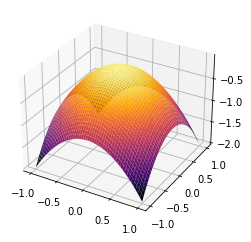

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(x_, y_ , z_, cmap = cm.inferno)
plt.show()

In [152]:
print(matrix_d.is_positive_definite)
print(matrix_d.is_positive_semidefinite)
print(matrix_d.is_negative_definite)
print(matrix_d.is_negative_semidefinite)
print(matrix_d.is_indefinite)

False
False
True
True
False


In [114]:
matrix_e = sp.Matrix([[1, -1], 
                     [-1, 1]])

In [115]:
matrix_e

Matrix([
[ 1, -1],
[-1,  1]])

In [127]:
surface_b = x.T * matrix_e * x
surface_b[0].simplify()

(a - b)**2

In [124]:
func_b = sp.lambdify((a, b), surface_b[0])

In [119]:
x_ = np.linspace(-1 ,1, 1000)
x_, y_ = np.meshgrid(x_, x_)

In [125]:
z_ = func_b(x_, y_)

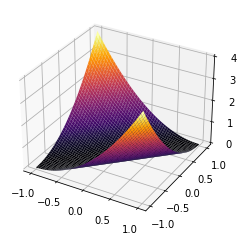

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.plot_surface(x_, y_ , z_, cmap = cm.inferno)
plt.show()

In [128]:
print(matrix_e.is_positive_definite)
print(matrix_e.is_positive_semidefinite)
print(matrix_e.is_negative_definite)
print(matrix_e.is_negative_semidefinite)
print(matrix_e.is_indefinite)

False
True
False
False
False
